# Introduction

>The [No-show](https://www.google.com/url?q=https%3A%2F%2Fd17h27t6h515a5.cloudfront.net%2Ftopher%2F2017%2FOctober%2F59dd2e9a_noshowappointments-kagglev2-may-2016%2Fnoshowappointments-kagglev2-may-2016.csv&sa=D&source=docs) dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Overview of the dataset
>A detailed description of the columns is tabulated below.

|Attribute| Description|
| :--- | :--------- |
|*PatientId*|is a unique identifier for each patient.|
|*AppointmentID*|patients recive a unique appointment identifier|
|*Gender*|The patient's gender|
|*ScheduledDay*|The patient's scheduled day|
|*AppointmentDay*|The patient's appointment day|
|*Age*|The patient's age|
|*Neighbourhood*|The patient's neighbourhood|
|*Scholarship*|The patient's scholarship status with two attributes, 0 - No Scholarship and 1 - has Scholarship|
|*Hipertension*|The patient's Hipertension status with two attributes, 0 - Has no Hipertension and 1 - Has Hipertension|
|*Diabetes*|The patient's Diabetes status with two attributes, 0 - No Diabetes and 1 - Diabetic|
|*Alcoholism*|The patient's Alcoholism status with two attributes, 0 - Not alcoholic and 1 - Alcoholic|
|*Handcap*|The patient's Handcap status with two attributes, 0 - Not Handcapped and 1 - Handcapped|
|*SMS_received*|Describes whether the patient received a text before the appontment, 0 - No and 1 - Yes|
|*No-show*|this attribute is <b>the Target Variable</b> which describes whether the patient showed for the appointment|

### Importing Libraries
>Importing libraries to be used for mathematical computation and data visualization is the first step. Numpy and pandas will assist in computation while matplotlib will be used to visualize the data.

In [1]:
#importing libraries needed for analysis
%matplotlib inline
%config inlinebackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")


### Update libraries
>Update the pandas library

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

>View the first five rows of your data

In [3]:
#display maximum number of rows and load the no-show appointment data
pd.options.display.max_rows = 9999
df = pd.read_csv('/home/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)

>The dataset has 110527 rows and 14 columns.

In [5]:
df.shape

(110527, 14)

>The info module produce a detailed description of range index, column number, value count of each attribute and data type of each attribute

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>To inspect where the missing values are, the isnull() or isna() modules are used.

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

## Data Wrangling
>The dataset was gathered in one spreadsheet,assessed and cleaned  


### Data Cleaning
>The PatientId and Scheduleday were dropped as they did not help explain the No_show attribute


>Convert 'Yes' to 1 and 'No' to 0 from the No_show column

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,-1] = labelencoder_Y.fit_transform(df.iloc[:,-1].values)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

df_clean = df.drop(['PatientId','AppointmentDay','AppointmentID'],axis=1)
df_clean.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [10]:
#convert 'No_show' to integer
df_clean["No_show"]=pd.to_numeric(df_clean["No_show"])

<a id='eda'></a>
## Exploratory Data Analysis

### How does each independent variable help explain the dependent variable (No_show)?

First let's get a summary of our cleaned dataset

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_clean.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [12]:
#function for value_counts()
columns = ['Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received',"No_show"]

#iterate through categorical columns
for i in range(0,len(columns)):
    print(df_clean[columns[i]].value_counts(normalize=True))

F    0.649977
M    0.350023
Name: Gender, dtype: float64
0    0.901734
1    0.098266
Name: Scholarship, dtype: float64
0    0.802754
1    0.197246
Name: Hipertension, dtype: float64
0    0.928135
1    0.071865
Name: Diabetes, dtype: float64
0    0.9696
1    0.0304
Name: Alcoholism, dtype: float64
0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: Handcap, dtype: float64
0    0.678974
1    0.321026
Name: SMS_received, dtype: float64
0    0.798067
1    0.201933
Name: No_show, dtype: float64


><li>There is imbalance in the gender of the patients as the ratio of female to male is 65:35.</li><br>
><li>Their is another imbalance between those who attended their scheduled appointments versus those who did not attend at a ratio of 20:80.</li>

In [13]:
df_clean.groupby('No_show').mean()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No_show,,,,,,,
0,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
1,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371


><li>The average age of those who did not show up for their scheduled appoint is higher than those who attended their scheduled appointment,</li>
><li>Those who received scholarships were likely to attend their scheduled appointment compared to those who did not receive scholarships,</li>
><li>Those who never showed up for their scheduled appointment had a higher Hipertension, Diabetes and Handcap averages compared to those who showed up,</li>
><li>The alcoholism average is approximately the same for bothe groups, and</li>
><li>Those who received SMS reminding them of their appointments were more likely to show up compared to those who never received the SMS.</li>

**Categorical mean** from all the other attributes are:

In [14]:
df_clean.groupby('Scholarship').mean()

,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
Scholarship,,,,,,,
0,37.794223,0.199837,0.073987,0.028415,0.022706,0.320842,0.198072
1,30.616242,0.173465,0.052389,0.048614,0.018046,0.322714,0.237363


In [15]:
df_clean.groupby('Hipertension').mean()

,Age,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,No_show
Hipertension,,,,,,,
0,31.308579,0.101177,0.016421,0.022913,0.015835,0.322476,0.209037
1,60.613596,0.086418,0.297509,0.060869,0.048346,0.315123,0.173020


In [16]:
df_clean.groupby('Diabetes').mean()

,Age,Scholarship,Hipertension,Alcoholism,Handcap,SMS_received,No_show
Diabetes,,,,,,,
0,35.208610,0.100328,0.149292,0.029517,0.019662,0.322916,0.203628
1,61.372529,0.071635,0.816568,0.041798,0.055646,0.296613,0.180033


In [17]:
df_clean.groupby('Alcoholism').mean()

,Age,Scholarship,Hipertension,Diabetes,Handcap,SMS_received,No_show
Alcoholism,,,,,,,
0,36.69681,0.096420,0.191048,0.07102,0.022115,0.323187,0.201946
1,49.59375,0.157143,0.394940,0.09881,0.026488,0.252083,0.201488


In [18]:
df_clean.groupby('Handcap').mean()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No_show
Handcap,,,,,,,
0,36.810465,0.098655,0.192389,0.069667,0.030309,0.322719,0.202353
1,50.855044,0.078355,0.432419,0.174339,0.034280,0.239471,0.179236
2,47.775956,0.098361,0.459016,0.234973,0.027322,0.234973,0.202186
3,48.615385,0.000000,0.076923,0.000000,0.230769,0.230769,0.230769
4,14.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333


In [19]:
df_clean.groupby('SMS_received').mean()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No_show
SMS_received,,,,,,,
0,36.887961,0.098021,0.198961,0.074449,0.033487,0.024932,0.167033
1,37.513810,0.098782,0.193619,0.066400,0.023871,0.016572,0.275745


><li>Age has a negative correlation with Scholarship and No_show,</li>
><li>Scholarship has a negative relationship with Age, Hipertension,Diabetes and Handcap,</li>
><li>Hipertension, Diabetes and Handicap all have a negative correlation with Scholarship, SMS_received and No_show; and </li>
><li>Alcoholism has a negative correlation with SMS_received and No_show</li>

### a)univariate anaysis

These plots describe the distribution of each categorical variable.

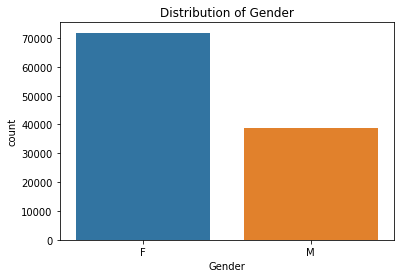

In [20]:
sns.countplot(df_clean['Gender'],label='count');
plt.title('Distribution of Gender');

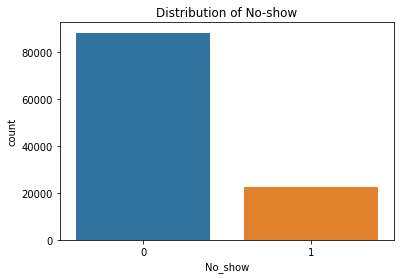

In [21]:
sns.countplot(df_clean['No_show'],label='count');
plt.title('Distribution of No-show');

Text(0,0.5,'Frequency')

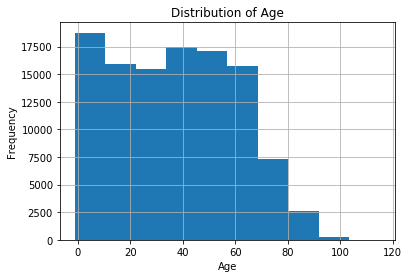

In [22]:
#histogram
df_clean['Age'].hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

### b)Bivariate Analysis

The target variable (No_show) is plotted against each independent variable to examine whether they are good predictors of the target variable.

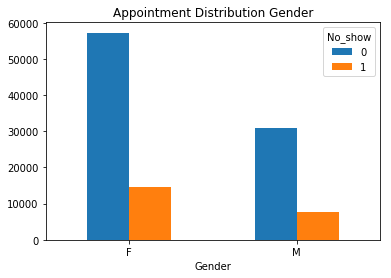

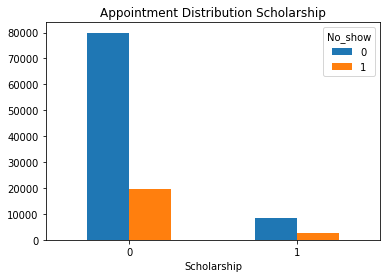

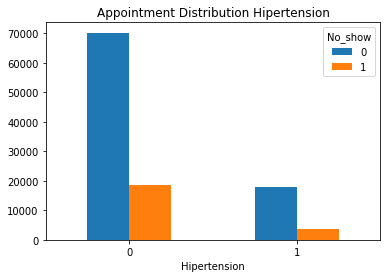

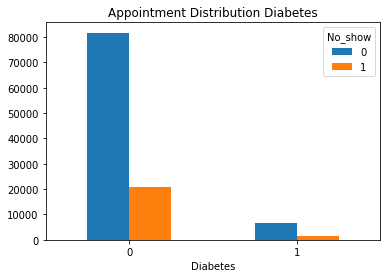

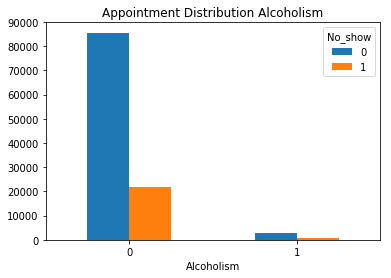

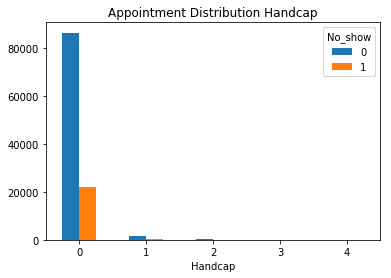

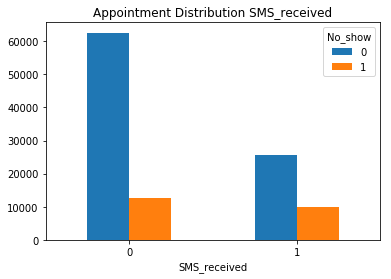

In [23]:
#barplot
def bar_plot(x,y):
    plot = pd.crosstab(x,y).plot(kind='bar',rot=0)
    return plot
columns = ['Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
for i in range(0,len(columns)):
    bar_plot(df_clean[columns[i]],df_clean['No_show'])
    plt.title('Appointment Distribution {}'.format(columns[i]))
    

<li>The likelihood of attending the appointment depends a great deal on whether SMS was received or not. Thus, the SMS-received can be a good predictor of the target variable.
<li>The likelihood of attending the appointment depends a great deal on whether the individual received a scholarship or not. Thus, the Scholarship can be a good predictor of the target variable.
<li>Hipertension may be a good predictor of the outcome
<li>Most of the patients in this dataset are in the age range of 0-10.

Text(0,0.5,'No_show')

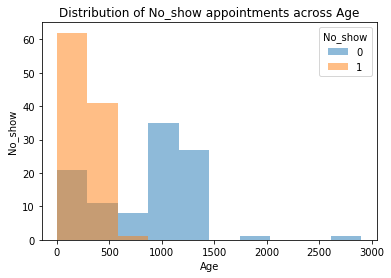

In [24]:
pd.crosstab(df_clean['Age'],df_clean['No_show']).plot(kind='hist',alpha=0.5)
plt.title('Distribution of No_show appointments across Age')
plt.xlabel('Age')
plt.ylabel('No_show')

<li>Age may be a good predictor of the outcome
<li>Diabetes may be a good predictor of the outcome
<li>Handcap may not a good predictor of the outcome
<li>Alcoholism may not be a good predictor

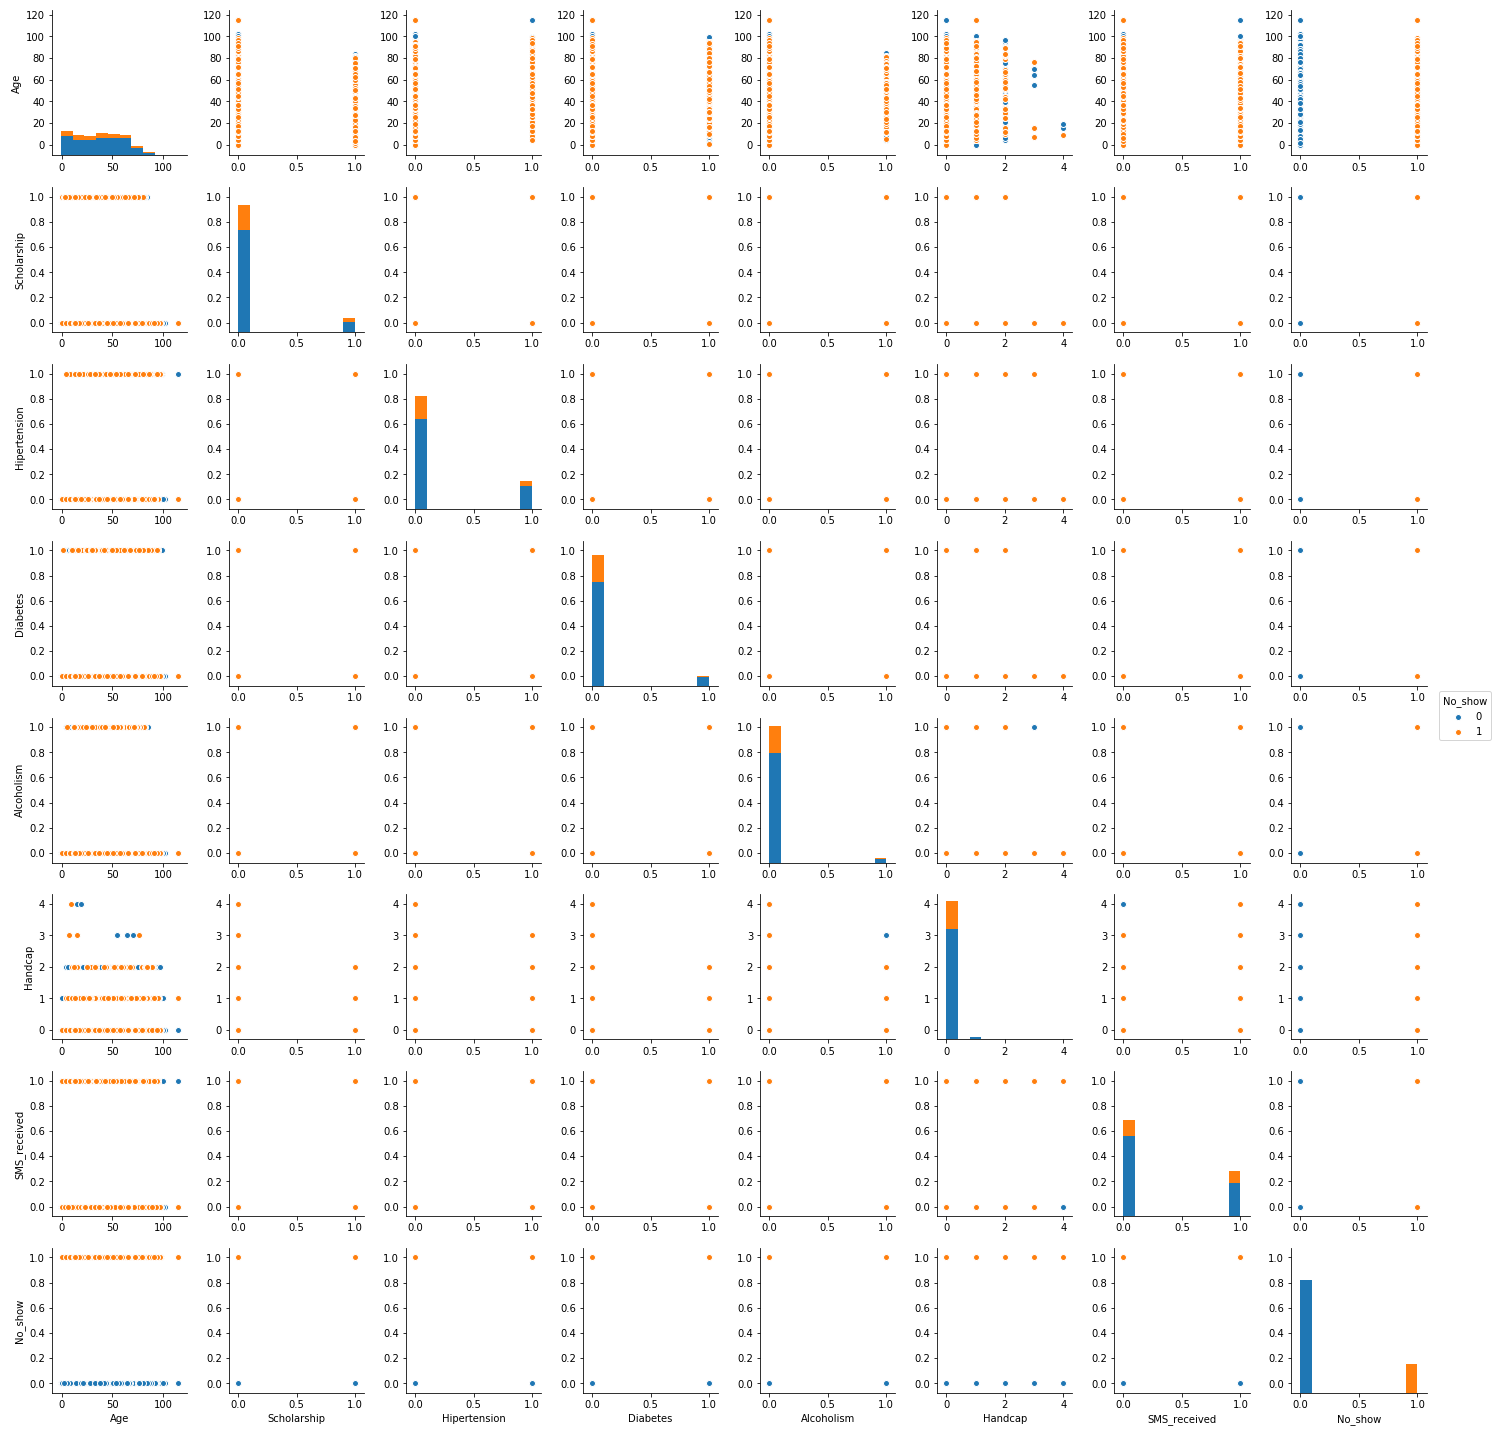

In [25]:
sns.pairplot(df_clean,hue='No_show');

### c)Multivariate Analysis

The relationship of each variable is investigated using the correlation matrix and a heat map is plotted to visually see these relationships.

In [26]:
df_clean.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
Handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
SMS_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
No_show,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


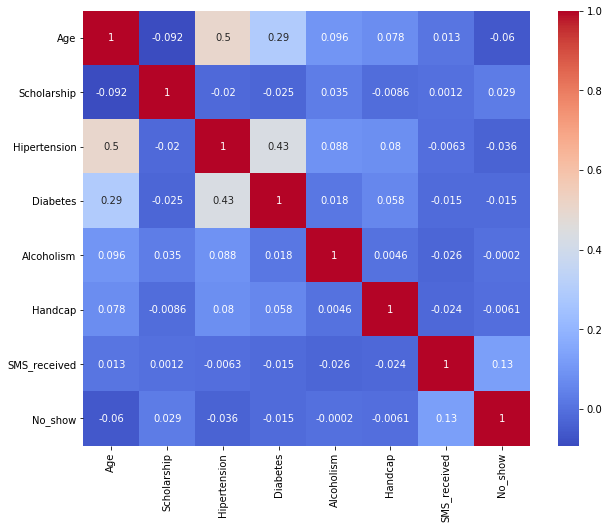

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_clean.corr(),annot=True,cmap='coolwarm');

## Limitations

<li>Alcoholism has unique values between 0 and 4. It is difficult to know what these numbers mean.</li>
<li>Majority of the patients are extremely young, an adult needs to be accountable for them.</li>

<a id='conclusions'></a>
## Conclusions
<li>Independent variables that help explain the No-show variable are: age,scholarship,hipertension,diabetes and SMS- received.</li>
<li>Majority of the patents are aged between 0 and 10 which explains why they are likely to miss their appointment.</li>
<li>Also children under the age of 10 are not all expected to own a cell phone, Which might explain why some never received an SMS about their appointment.</li>
<li>The correlation between No-show and SMS-received is 0.13 which is pretty strong compared to other independent variables. Which means it's influence on the No-show outcome is pretty strong.</li>

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255